In [76]:
import pandas as pd
df=pd.read_csv("/content/sample_data/test.csv")
#print(df[df["trip_uuid"]=='trip-153741093647649320'])
#df[df["trip_uuid"]=='trip-153741093647649320']

**1. Define Problem Statement and perform Exploratory Data Analysis (10 points)**

In [6]:
df.shape

(2739, 24)

In [7]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                          object
cutoff_factor                     float64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [8]:
df.isna().sum()

data                               0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
trip_uuid                          0
source_center                      0
source_name                       12
destination_center                 0
destination_name                   4
od_start_time                      1
od_end_time                        1
start_scan_to_end_scan             1
is_cutoff                          1
cutoff_factor                      1
cutoff_timestamp                   1
actual_distance_to_destination     1
actual_time                        1
osrm_time                          1
osrm_distance                      1
factor                             1
segment_actual_time                1
segment_osrm_time                  1
segment_osrm_distance              1
segment_factor                     1
dtype: int64

In [9]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000
mean,662.407962,158.874726,159.991105,278.639153,149.631118,195.958418,2.097821,35.207816,17.112856,20.822530,2.409063
std,838.968245,278.038309,278.448593,452.220586,254.430360,345.387696,1.405987,51.359809,11.346538,12.993360,9.990051
min,31.000000,9.000000,9.000267,9.000000,6.000000,9.202000,0.272727,-26.000000,0.000000,0.000000,-1.857143
25%,121.250000,22.000000,22.223800,43.000000,23.000000,26.285475,1.548614,18.000000,10.000000,10.917075,1.333333
50%,265.000000,44.000000,44.386490,89.000000,45.000000,51.484950,1.800162,27.000000,16.000000,22.548250,1.692308
75%,836.000000,154.000000,154.084458,278.750000,138.000000,179.363750,2.199419,39.000000,22.000000,26.913850,2.307692
max,3230.000000,1689.000000,1689.340140,2815.000000,1549.000000,2095.672900,31.200000,1038.000000,142.000000,154.061600,493.000000


In [10]:
df["route_type"]=df["route_type"].astype("category")
df["data"]=df["data"].astype("category")

In [11]:
df.groupby("data")["trip_uuid"].count()
df.groupby("route_type")["trip_uuid"].count()

route_type
Carting    1010
FTL        1729
Name: trip_uuid, dtype: int64

In [12]:
df.groupby("trip_uuid")["actual_distance_to_destination","actual_time"].sum()


<ipython-input-12-85626fb79615>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("trip_uuid")["actual_distance_to_destination","actual_time"].sum()


,actual_distance_to_destination,actual_time
trip_uuid,,
trip-153671191949943656,190.496886,491.0
trip-153671320807895983,260.782753,543.0
trip-153671602871109556,715.920643,1240.0
trip-153673012557297456,20.086304,36.0
trip-153673541039568251,48.566191,125.0
...,...,...
trip-153860120404625095,68.371761,133.0
trip-153860373904534393,21.140551,28.0
trip-153860909786408355,273.079546,391.0


(<seaborn.axisgrid.FacetGrid at 0x7d9247e2f910>,
 <seaborn.axisgrid.FacetGrid at 0x7d924054c9a0>)

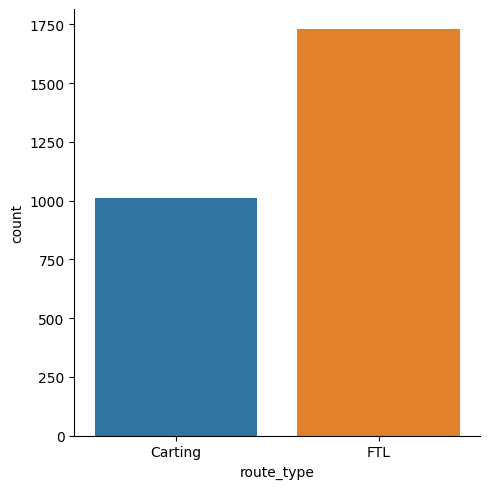

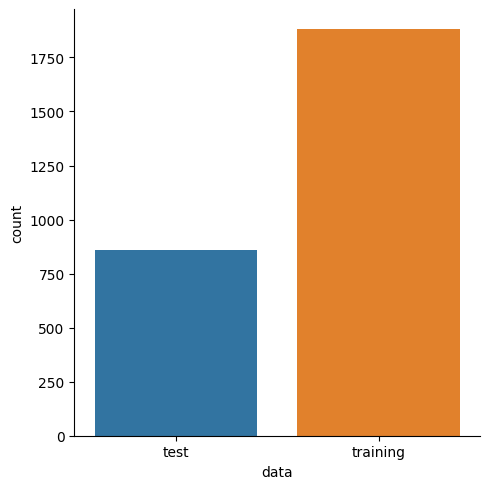

In [13]:
import seaborn as sns
sns.catplot(kind = 'count',
                data = df,
                x    = 'route_type'), sns.catplot(kind = 'count',
                data = df,
                x    = 'data')

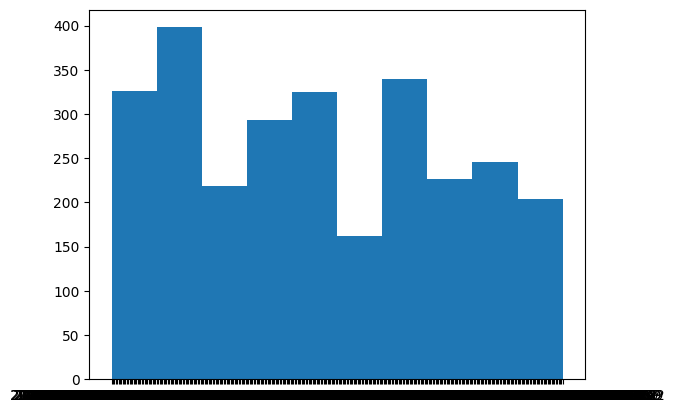

In [14]:
import matplotlib.pyplot as plt
plt.hist(data=df,x='trip_creation_time')
plt.show()

<Axes: xlabel='factor', ylabel='data'>

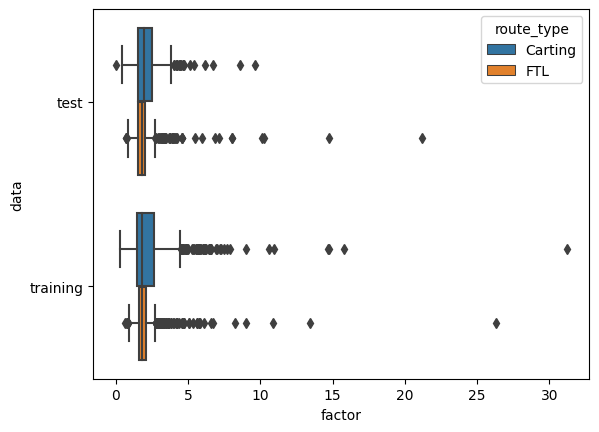

In [56]:
sns.boxplot(data=df,x='factor',y="data",hue='route_type')

In [82]:
import pandas as pd
df=pd.read_csv("/content/sample_data/test.csv")
import numpy as np
df['factor'].fillna(0,inplace=True)

Q1=np.percentile(df[(df['data']=='test') & (df['route_type']=='Carting')]['factor'], 25, method='midpoint')
Q3=np.percentile(df[(df['data']=='test') & (df['route_type']=='Carting')]['factor'], 75, method='midpoint')
IQR=Q3-Q1
upper=IQR*1.5+Q3
lower=IQR*1.5-Q1
#Removing Outliers
upper_array = np.where(df[(df['data']=='test') & (df['route_type']=='Carting')]['factor']>=upper)[0]
lower_array = np.where(df[(df['data']=='test') & (df['route_type']=='Carting')]['factor']<=lower)[0]
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
df.reset_index(drop=True,inplace=True)

Q1=np.percentile(df[(df['data']=='test') & (df['route_type']=='FTL')]['factor'], 25, method='midpoint')
Q3=np.percentile(df[(df['data']=='test') & (df['route_type']=='FTL')]['factor'], 75, method='midpoint')
IQR=Q3-Q1
upper=IQR*1.5+Q3
lower=IQR*1.5-Q1
#Removing Outliers
upper_array = np.where(df[(df['data']=='test') & (df['route_type']=='Carting')]['factor']>=upper)[0]
lower_array = np.where(df[(df['data']=='test') & (df['route_type']=='Carting')]['factor']<=lower)[0]
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
df.reset_index(drop=True,inplace=True)

Q1=np.percentile(df[(df['data']=='training') & (df['route_type']=='Carting')]['factor'], 25, method='midpoint')
Q3=np.percentile(df[(df['data']=='training') & (df['route_type']=='Carting')]['factor'], 75, method='midpoint')
IQR=Q3-Q1
upper=IQR*1.5+Q3
lower=IQR*1.5-Q1
#Removing Outliers
upper_array = np.where(df[(df['data']=='training') & (df['route_type']=='Carting')]['factor']>=upper)[0]
lower_array = np.where(df[(df['data']=='training') & (df['route_type']=='Carting')]['factor']<=lower)[0]
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
df.reset_index(drop=True,inplace=True)

Q1=np.percentile(df[(df['data']=='training') & (df['route_type']=='FTL')]['factor'], 25, method='midpoint')
Q3=np.percentile(df[(df['data']=='training') & (df['route_type']=='FTL')]['factor'], 75, method='midpoint')
IQR=Q3-Q1
upper=IQR*1.5+Q3
lower=IQR*1.5-Q1
#Removing Outliers
upper_array = np.where(df[(df['data']=='training') & (df['route_type']=='Carting')]['factor']>=upper)[0]
lower_array = np.where(df[(df['data']=='training') & (df['route_type']=='Carting')]['factor']<=lower)[0]
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
df.reset_index(drop=True,inplace=True)


In [87]:
df.corr

<bound method DataFrame.corr of             data          trip_creation_time  \
0       training  2018-09-20 02:35:36.476840   
1       training  2018-09-20 02:35:36.476840   
2       training  2018-09-20 02:35:36.476840   
3       training  2018-09-20 02:35:36.476840   
4       training  2018-09-20 02:35:36.476840   
...          ...                         ...   
133220  training  2018-09-20 16:24:28.436231   
133221  training  2018-09-20 16:24:28.436231   
133222  training  2018-09-20 16:24:28.436231   
133223  training  2018-09-20 16:24:28.436231   
133224  training  2018-09-20 16:24:28.436231   

                                      route_schedule_uuid route_type  \
0       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4       thanos::sroute:eb7bfc78

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


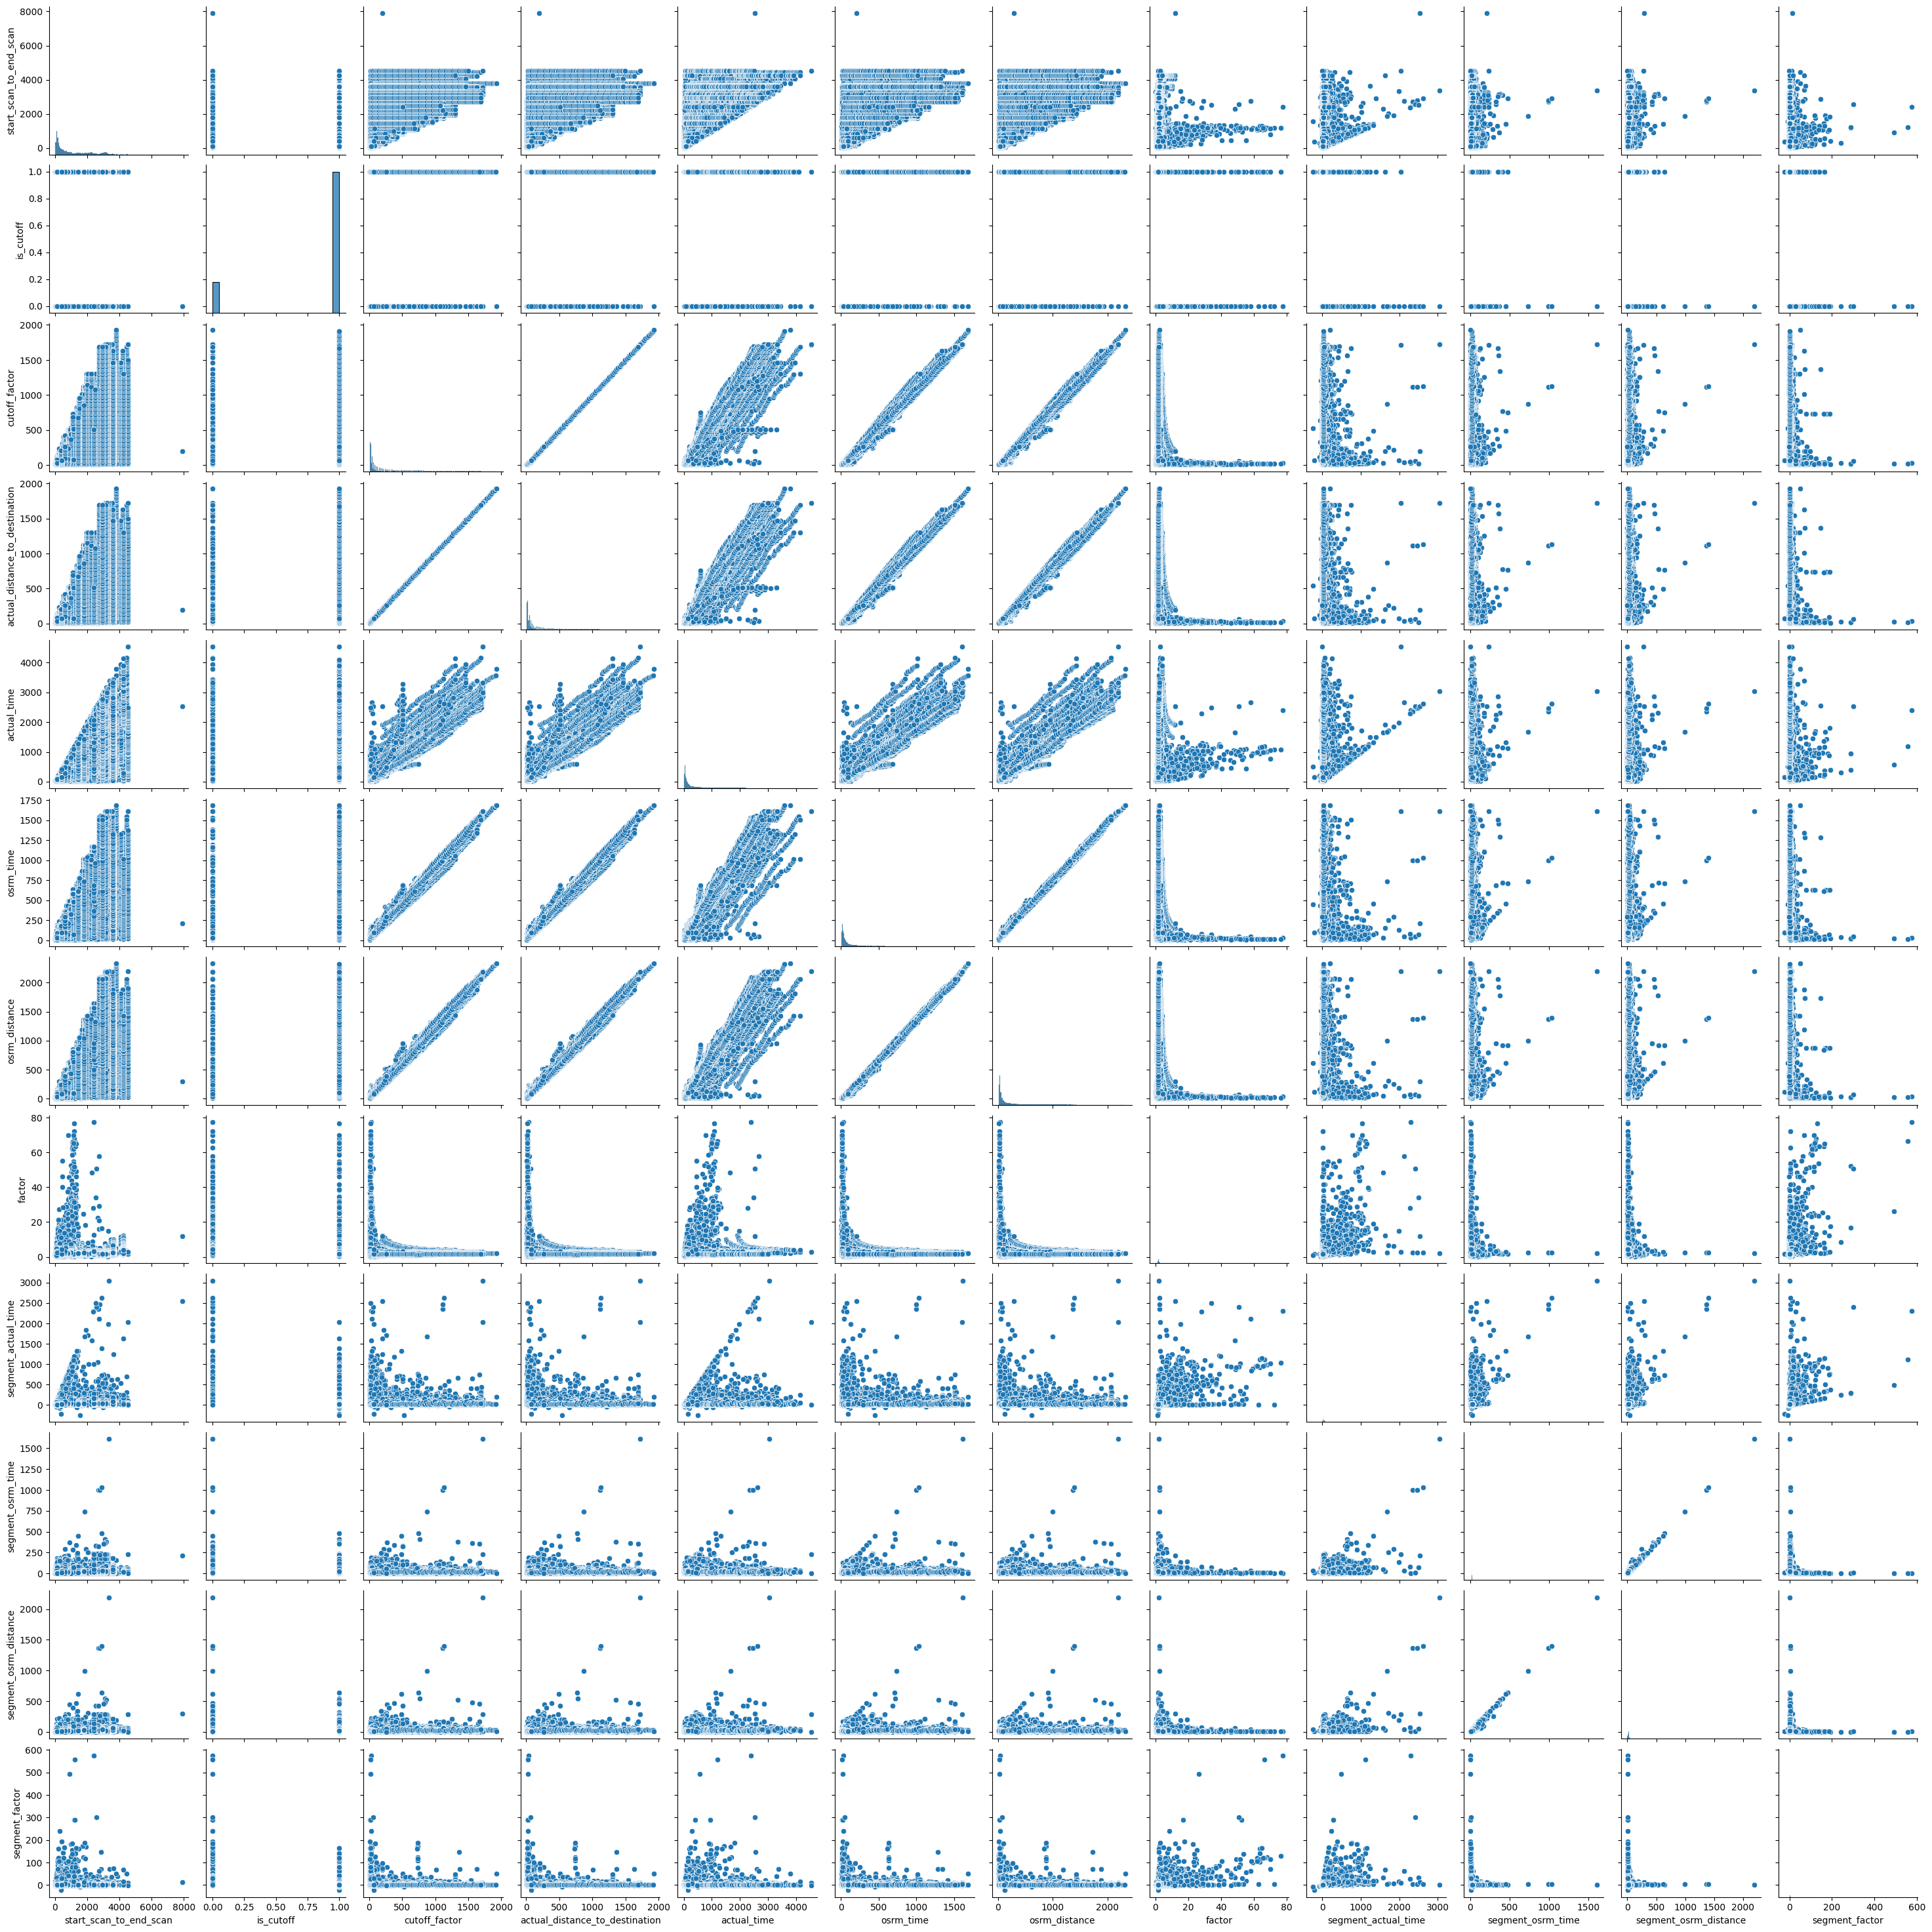

In [89]:
df1=df.groupby("trip_uuid")["actual_distance_to_destination","actual_time"].sum()
sns.pairplot(df1,kind='scatter')

Comments for each univariate and bivariate plot

<Axes: xlabel='route_type', ylabel='count'>

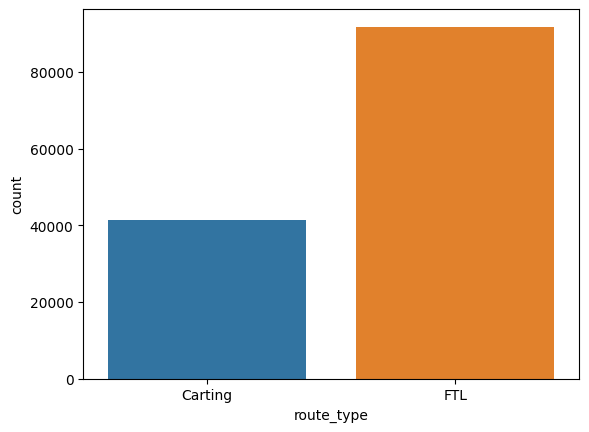

In [95]:
sns.countplot(x=df['route_type'])

<Axes: xlabel='route_type', ylabel='count'>

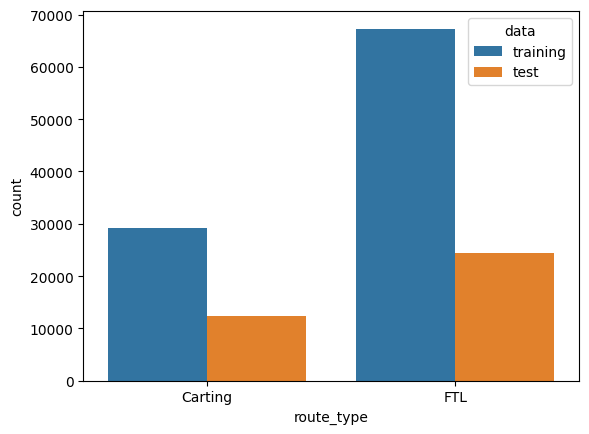

In [97]:
sns.countplot(x=df['route_type'],hue=df['data'])

**2. Feature Creation (10 Points)**

In [98]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133220,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
133221,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
133222,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
133223,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [213]:
import pandas as pd
df=pd.read_csv("/content/sample_data/test.csv")

df['dest_state'] =df['destination_name'].str.split('(',expand=True)[1]
df['dest_state']=df['dest_state'].str.replace(')','')
df['source_state'] =df['source_name'].str.split('(',expand=True)[1]
df['source_state']=df['source_state'].str.replace(')','')
df['trip_year']=pd.to_datetime(df['trip_creation_time']).dt.year
df['trip_month']=pd.to_datetime(df['trip_creation_time']).dt.month
df['trip_day']=pd.to_datetime(df['trip_creation_time']).dt.day
df['od_time_taken']=pd.to_datetime(df['od_end_time'])-pd.to_datetime(df['od_start_time'])
df.drop(['od_end_time','od_start_time'],axis=1)
df['scan_diff']=pd.to_datetime(df['start_scan_to_end_scan'])-pd.to_datetime(df['od_start_time'])


<ipython-input-213-b9a5d40c6057>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['dest_state']=df['dest_state'].str.replace(')','')
<ipython-input-213-b9a5d40c6057>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['source_state']=df['source_state'].str.replace(')','')


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,dest_state,source_state,trip_year,trip_month,trip_day,od_time_taken
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,14.0,11.0,11.9653,1.272727,Gujarat,Gujarat,2018,9,20,0 days 01:26:12.818197
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,10.0,9.0,9.7590,1.111111,Gujarat,Gujarat,2018,9,20,0 days 01:26:12.818197
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,16.0,7.0,10.8152,2.285714,Gujarat,Gujarat,2018,9,20,0 days 01:26:12.818197
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,21.0,12.0,13.0224,1.750000,Gujarat,Gujarat,2018,9,20,0 days 01:26:12.818197
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,6.0,5.0,3.9153,1.200000,Gujarat,Gujarat,2018,9,20,0 days 01:26:12.818197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,12.0,12.0,8.1858,1.000000,Haryana,Haryana,2018,9,20,0 days 07:07:41.181838
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,26.0,21.0,17.3725,1.238095,Haryana,Haryana,2018,9,20,0 days 07:07:41.181838
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,20.0,34.0,20.7053,0.588235,Haryana,Haryana,2018,9,20,0 days 07:07:41.181838
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,17.0,27.0,18.8885,0.629630,Haryana,Haryana,2018,9,20,0 days 07:07:41.181838


**Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.**
Step 1 - Define Null and Alternate Hypothesis
Null Hypothesis (H0) : The two samples are independent.
Alternate Hyphothesis (Ha) : There is a dependency between the samples.
Significance Level (alpha) : 0.05

Step 2 - Validate the assumptions
Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.

**Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**
Step 1 - Define Null and Alternate Hypothesis
Null Hypothesis (H0) : The two samples are independent.
Alternate Hyphothesis (Ha) : There is a dependency between the samples.
Significance Level (alpha) : 0.05

Step 2 - Validate the assumptions
Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.

**Merging of rows and aggregation of fields**

In [229]:
grp = df.groupby(['data','trip_uuid', 'trip_creation_time','route_type','source_name','destination_name','source_center'])
df2 = grp.agg({'od_start_time' : 'min', 'od_end_time' : 'max','actual_distance_to_destination':'sum',
               'segment_actual_time':'sum','segment_osrm_time':'sum','segment_osrm_distance':'sum'})
df2.sort_values(by=['trip_uuid', 'trip_creation_time','od_start_time'],inplace=True)
df2 = df2.reset_index()
grp = df2.groupby(['data','trip_uuid', 'trip_creation_time','route_type'])
df3 = grp.agg({'source_center':'first','source_name':'first',
 'segment_actual_time':'sum','segment_osrm_time':'sum','segment_osrm_distance':'sum'})
df3.columns = ["data","trip_uuid", "trip_creation_time", "route_type",'source_name']
df3



data  \
data     trip_uuid               trip_creation_time         route_type                 
test     trip-153800653897073708 2018-09-27 00:02:18.970980 Carting     IND424006AAA   
         trip-153800654935210748 2018-09-27 00:02:29.352390 Carting     IND400072AAB   
         trip-153800658820968126 2018-09-27 00:03:08.209931 FTL         IND302014AAA   
         trip-153800659468028518 2018-09-27 00:03:14.680535 Carting     IND421302AAF   
         trip-153800661729668086 2018-09-27 00:03:37.296972 Carting     IND395009AAA   
...                                                                              ...   
training trip-153800579708680929 2018-09-26 23:49:57.087036 Carting     IND390022AAA   
         trip-153800585467019097 2018-09-26 23:50:54.670423 Carting     IND630561AAA   
         trip-153800603160412602 2018-09-26 23:53:51.604388 FTL         IND424006AAA   
         trip-153800605670819251 2018-09-26 23:54:16.708455 FTL         IND205001AAB   
         trip-153800606794535545 2018-09-26 23:54:27.945614 Carting     IND201007AAA   

                                                                                                  trip_uuid  \
data     trip_uuid               trip_creation_time         route_type                                        
test     trip-153800653897073708 2018-09-27 00:02:18.970980 Carting          Dhule_MIDCAvdn_I (Maharashtra)   
         trip-153800654935210748 2018-09-27 00:02:29.352390 Carting                Mumbai Hub (Maharashtra)   
         trip-153800658820968126 2018-09-27 00:03:08.209931 FTL                      Jaipur_Hub (Rajasthan)   
         trip-153800659468028518 2018-09-27 00:03:14.680535 Carting             Mumbai_Kalyan (Maharashtra)   
         trip-153800661729668086 2018-09-27 00:03:37.296972 Carting            Surat_Central_D_12 (Gujarat)   
...                                                                                                     ...   
training trip-153800579708680929 2018-09-26 23:49:57.087036 Carting       Vadodara_Karelibaug_DPC (Gujarat)   
         trip-153800585467019097 2018-09-26 23:50:54.670423 Carting        Sivaganga_Wardno3_D (Tamil Nadu)   
         trip-153800603160412602 2018-09-26 23:53:51.604388 FTL              Dhule_MIDCAvdn_I (Maharashtra)   
         trip-153800605670819251 2018-09-26 23:54:16.708455 FTL         Mainpuri_Agraroad_I (Uttar Pradesh)   
         trip-153800606794535545 2018-09-26 23:54:27.945614 Carting     GZB_Mohan_Nagar_DPC (Uttar Pradesh)   

                                                                        trip_creation_time  \
data     trip_uuid               trip_creation_time         route_type                       
test     trip-153800653897073708 2018-09-27 00:02:18.970980 Carting                  126.0   
         trip-153800654935210748 2018-09-27 00:02:29.352390 Carting                   58.0   
         trip-153800658820968126 2018-09-27 00:03:08.209931 FTL                      334.0   
         trip-153800659468028518 2018-09-27 00:03:14.680535 Carting                   27.0   
         trip-153800661729668086 2018-09-27 00:03:37.296972 Carting                  131.0   
...                                                                                    ...   
training trip-153800579708680929 2018-09-26 23:49:57.087036 Carting                   46.0   
         trip-153800585467019097 2018-09-26 23:50:54.670423 Carting                  296.0   
         trip-153800603160412602 2018-09-26 23:53:51.604388 FTL                      184.0   
         trip-153800605670819251 2018-09-26 23:54:16.708455 FTL                      623.0   
         trip-153800606794535545 2018-09-26 23:54:27.945614 Carting                  128.0   

                                                                        route_type  \
data     trip_uuid               trip_creation_time         route_type               
test     trip-153800653897073708 2018-09-27 00:02:18.970980 Carting           47.0   
         t

**Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.**

In [241]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
num_cols=['od_time_taken',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']
scaler = StandardScaler()
standard_df = scaler.fit_transform(df[['od_time_taken']])
df1 = pd.DataFrame(standard_df)
df1

,0
0,-0.844299
1,-0.844299
2,-0.844299
3,-0.844299
4,-0.844299
...,...
144862,-0.515013
144863,-0.515013
144864,-0.515013
144865,-0.515013


**Recommendations**
1. Delhivery company can increase their business by giving offers / discounts to busiest
corridor under busiest state
2. Delhivery company can increase their business by giving offers / discounts to route
type FTL
3. Delhivery company should focus more on Southern states as more parcels are
orginated and delivered
4. Delhivery company should plan to use shortest path from source to destination
center